### Handwritten digits classification using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

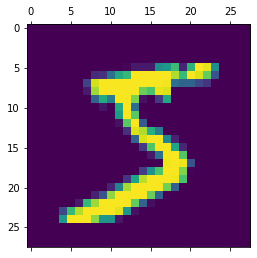

In [6]:
plt.matshow(X_train[0])
plt.show()

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# Scaling X_train and X_test
X_train = X_train/255;
X_test = X_test/255;

In [9]:
# Flatenning X_train and X_test
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

## Creating Model

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    # Output class is categorical
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4880 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3061 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2858 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2746 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9264


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2672 - accuracy: 0.9272


[0.26716697216033936, 0.9272000193595886]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted

array([[1.8555455e-05, 1.3453066e-10, 5.4737444e-05, ..., 7.7145028e-01,
        8.0439728e-05, 1.0192692e-03],
       [2.2488832e-04, 1.3386314e-06, 4.2910159e-01, ..., 3.8192170e-16,
        1.1090852e-04, 3.8271201e-13],
       [1.5325458e-06, 5.0310194e-01, 8.4586442e-03, ..., 8.2969666e-04,
        3.0563772e-03, 2.2378564e-04],
       ...,
       [2.7595305e-11, 3.9124377e-11, 1.4460492e-08, ..., 4.9955047e-06,
        2.2554168e-05, 6.2749605e-05],
       [8.7835055e-09, 3.1781198e-08, 1.6816495e-08, ..., 7.9878228e-09,
        5.1647425e-04, 1.9899018e-08],
       [4.5302460e-08, 1.4004371e-15, 1.4709872e-06, ..., 1.8340741e-13,
        2.0150359e-09, 1.3356944e-12]], dtype=float32)

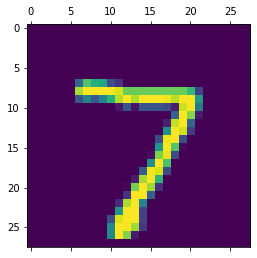

In [16]:
plt.matshow(X_test[0])
plt.show()

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(y) for y in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [19]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    1,    0,    5,    7,    3,    3,    0],
       [   0, 1111,    4,    1,    0,    1,    4,    2,   12,    0],
       [   6,    8,  920,   15,    8,    4,   13,   11,   44,    3],
       [   4,    0,   19,  897,    0,   33,    2,   15,   34,    6],
       [   1,    1,    4,    1,  909,    0,   10,    4,   11,   41],
       [  10,    3,    3,   16,    6,  785,   15,    6,   40,    8],
       [  10,    3,    5,    0,    7,   11,  915,    2,    5,    0],
       [   1,    6,   24,    2,    6,    0,    0,  956,    3,   30],
       [   5,    8,    5,   13,    9,   18,    9,   11,  891,    5],
       [   9,    7,    1,    7,   17,    5,    0,   24,   12,  927]],
      dtype=int32)>

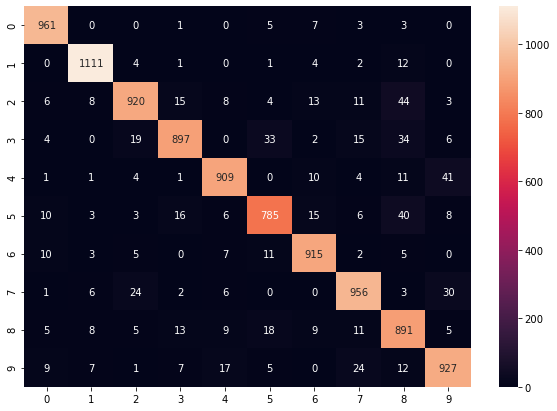

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 7))
plt.xlabel('predicted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Using hidden layers

In [21]:
models = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2624 - accuracy: 0.9280
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2590 - accuracy: 0.9284
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2552 - accuracy: 0.9300
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2522 - accuracy: 0.9301
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2503 - accuracy: 0.9311


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2624 - accuracy: 0.9273


[0.2624301016330719, 0.927299976348877]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(y) for y in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    2,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,    9,  918,   18,   11,    5,   13,    8,   43,    3],
       [   2,    0,   14,  928,    1,   23,    3,    9,   24,    6],
       [   1,    1,    4,    2,  935,    0,    7,    3,    9,   20],
       [   7,    2,    1,   34,   12,  781,   13,    5,   32,    5],
       [   9,    3,    4,    1,    7,   14,  916,    1,    3,    0],
       [   1,   11,   20,   12,   10,    1,    0,  932,    3,   38],
       [   5,    7,    5,   21,    9,   25,    8,    5,  881,    8],
       [   9,    8,    1,   11,   41,    6,    0,   12,   13,  908]],
      dtype=int32)>

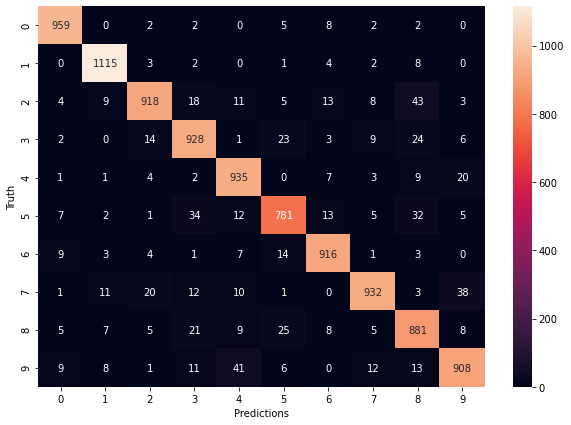

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.show()

In [25]:
# Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2862 - accuracy: 0.9200
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1399 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0986 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0767 - accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0408 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0341 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0288 - accuracy: 0.9917
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step 

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9765


[0.08523769676685333, 0.9764999747276306]

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(y) for y in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    1,    1,    1,    2,    3,    2],
       [   0, 1121,    1,    5,    0,    1,    2,    1,    4,    0],
       [   4,    0, 1000,   10,    2,    0,    2,    5,    9,    0],
       [   0,    0,    0,  997,    1,    0,    0,    3,    5,    4],
       [   0,    0,    4,    1,  967,    0,    2,    0,    1,    7],
       [   2,    0,    0,   20,    2,  850,    6,    3,    7,    2],
       [   3,    1,    2,    2,    1,    4,  943,    0,    2,    0],
       [   1,    4,   10,    1,    2,    0,    0,  999,    2,    9],
       [   0,    0,    4,    7,    3,    2,    1,    3,  950,    4],
       [   2,    3,    0,    7,   12,    5,    1,    3,    5,  971]],
      dtype=int32)>

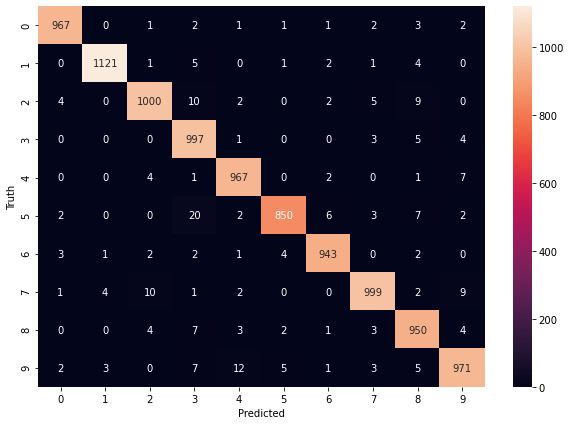

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Using softmax as last layer activation fun

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2508 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1115 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0795 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0609 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0489 - accuracy: 0.9848


In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0865 - accuracy: 0.9732


[0.08652467280626297, 0.9732000231742859]